## Collection & Insight of The Dataset

CAR QUALITY CLASSIFIACTION/PREDICTION: https://www.kaggle.com/datasets/gagasrock/car-quality-prediction

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of Car whether it is Cheap,Average or High.
This dataset consists of 10 independent variables i.e Year,Make,Model,Condition,Tranmission,Cylinders,Fuel,Odometer,Engine Power,Milage.
Generally, the Price Range or Quality of the Car depends on these parameters. These parameters play a vital role in the predictive analysis of the quality of the Car.

Target: Cheap(0) | Average(1) | High(2)

The Target Variable is Price which gives the information about the Price range of car whether it is Cheap,Average or High.

## Import the required Libraries and load the data into Dataframe

In [52]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import catboost as ctb
import seaborn as sns
import matplotlib.pyplot as plt

#Model development and feature engineering libraries
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc,roc_auc_score
from tensorflow import keras
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Cars Dataset.csv")

## Exploratory Data Analysis

In [3]:
#convert to int type
df.index.astype('int64')

RangeIndex(start=0, stop=12076, step=1)

In [4]:
#to check null values
df.isnull().sum()

YEAR            0
MAKE            0
MODEL           0
CONDITION       0
TRANSMISSION    0
CYLINDERS       0
FUEL            0
ODOMETER        0
ENGINE POWER    0
MILAGE          0
Price           0
dtype: int64

In [5]:
df.shape

(12076, 11)

### Data Visualization

In [6]:
#to get overview of the data
#df.profile_report()

### Which brands are the ones mostly being sold in the second hand market?

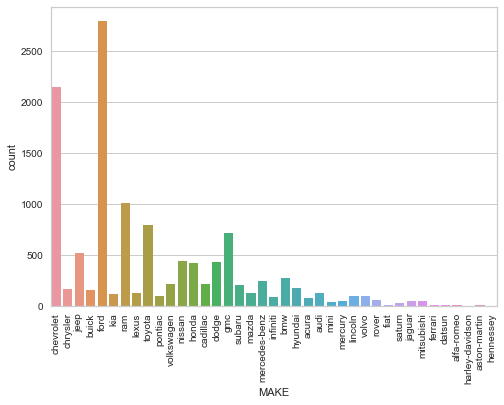

In [7]:
ax = sns.countplot(x="MAKE",data=df)
ax.tick_params(axis='x', rotation=90)

### Total numbers of Cars with number of cylinders.

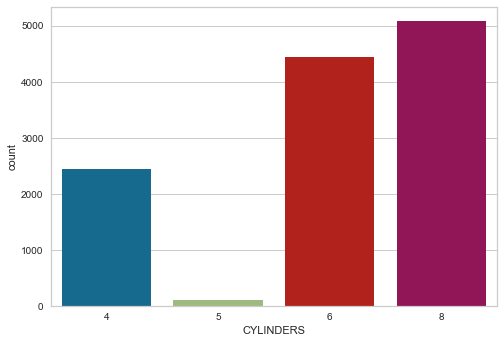

In [8]:
sns.countplot(x="CYLINDERS",data=df)
ax.tick_params(axis='x', rotation=90)

### Used Cars Market has high demand of cars with Gas fuel.

<AxesSubplot:xlabel='FUEL', ylabel='count'>

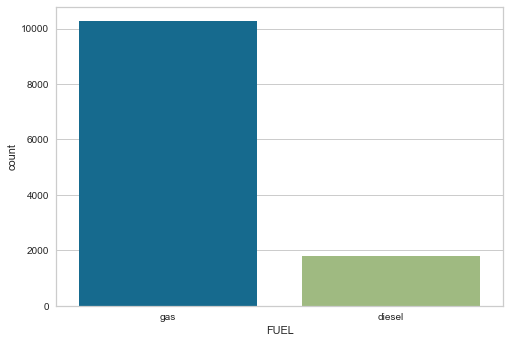

In [9]:
sns.countplot(x="FUEL",data=df)

### Engine Power with Low CC has high demand as compare to Avg CC and High CC

<AxesSubplot:xlabel='ENGINE POWER', ylabel='count'>

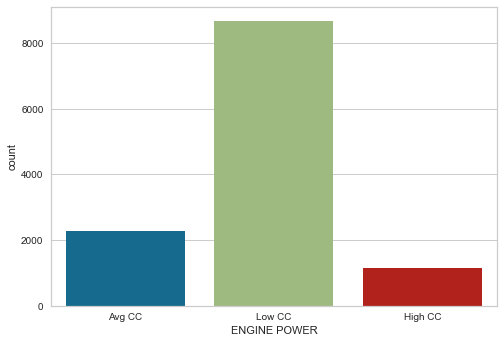

In [10]:
sns.countplot(x="ENGINE POWER",data=df)

<AxesSubplot:xlabel='Price', ylabel='count'>

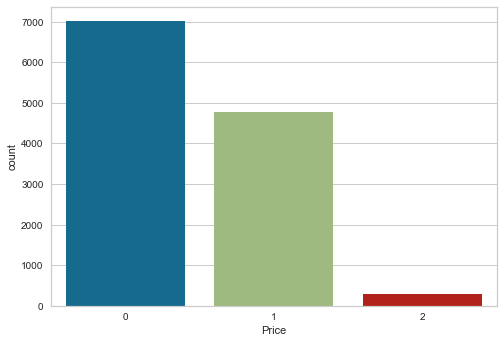

In [11]:
sns.countplot(x="Price",data=df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12076 entries, 0 to 12075
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          12076 non-null  int64 
 1   MAKE          12076 non-null  object
 2   MODEL         12076 non-null  object
 3   CONDITION     12076 non-null  object
 4   TRANSMISSION  12076 non-null  object
 5   CYLINDERS     12076 non-null  int64 
 6   FUEL          12076 non-null  object
 7   ODOMETER      12076 non-null  int64 
 8   ENGINE POWER  12076 non-null  object
 9   MILAGE        12076 non-null  int64 
 10  Price         12076 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.0+ MB


In [13]:
#count model for each car manufacturing company
df.MAKE.value_counts()

ford               2792
chevrolet          2143
ram                1003
toyota              791
gmc                 713
jeep                520
nissan              441
dodge               429
honda               414
bmw                 269
mercedes-benz       245
volkswagen          217
cadillac            208
subaru              206
hyundai             174
chrysler            166
buick               156
lexus               127
audi                122
mazda               120
kia                 113
lincoln              91
pontiac              90
volvo                90
infiniti             82
acura                71
rover                57
mitsubishi           48
jaguar               45
mercury              41
mini                 32
saturn               29
fiat                  9
ferrari               9
datsun                7
alfa-romeo            2
aston-martin          2
harley-davidson       1
hennessey             1
Name: MAKE, dtype: int64

### How do the Used Car Prices vary as per the Brands

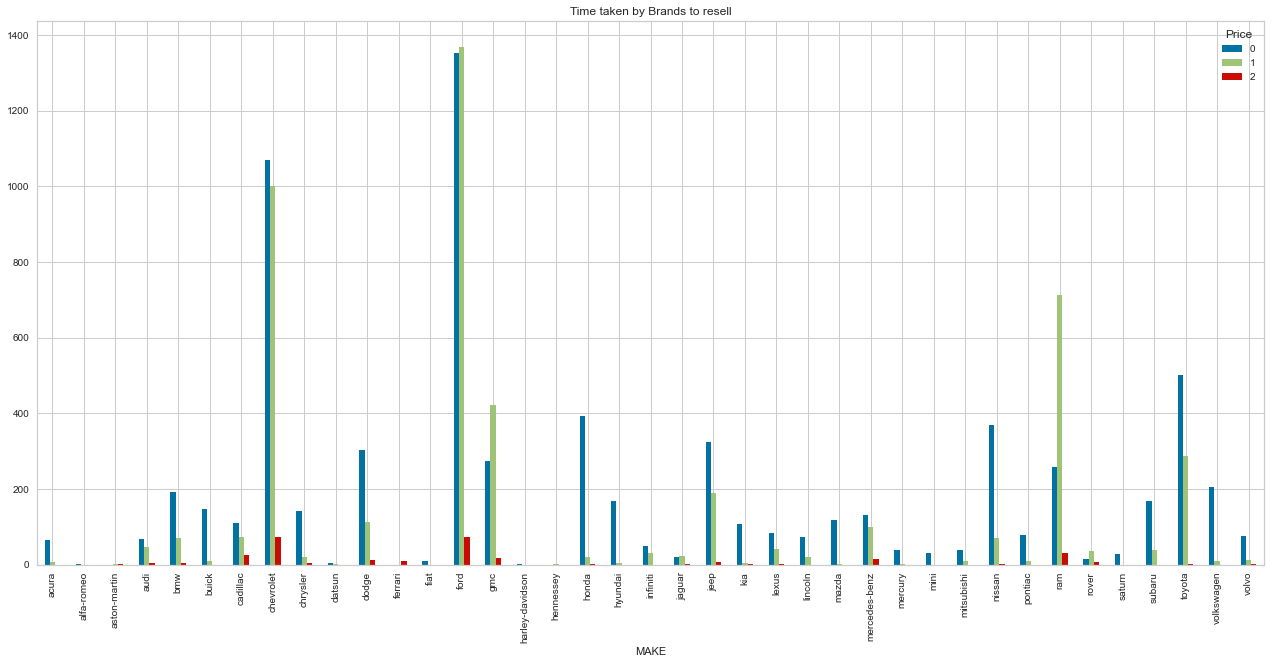

In [14]:
crosstb = pd.crosstab(df.MAKE,df.Price)
crosstb.plot(kind='bar',figsize=(22,10),title='Time taken by Brands to resell');

### Is low Engine Power Automatic Car high in demand? 

Text(0, 0.5, 'No. of cars sold')

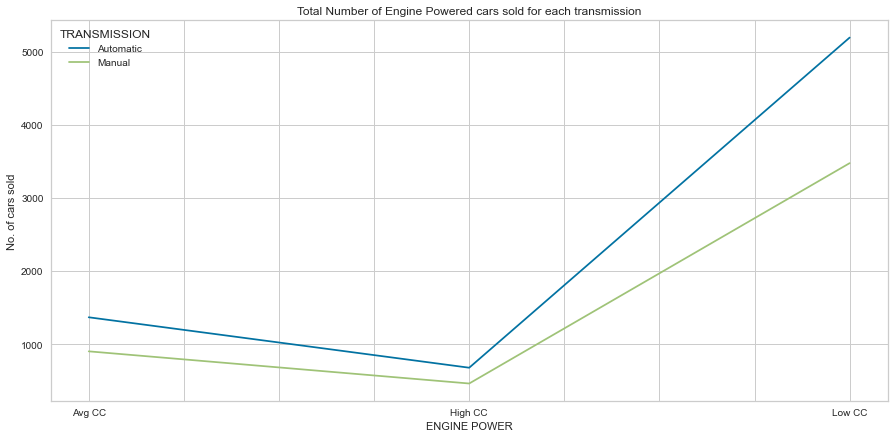

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['ENGINE POWER','TRANSMISSION']).count()['Price'].unstack().plot(ax=ax, title='Total Number of Engine Powered cars sold for each transmission')
plt.ylabel('No. of cars sold') #low engine powered cars sold are automatic

Text(0, 0.5, 'No. of Car Models')

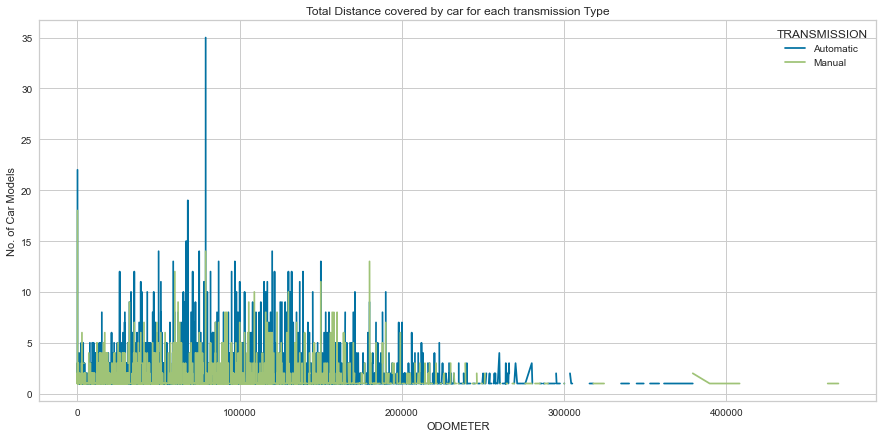

In [16]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['ODOMETER','TRANSMISSION']).count()['MAKE'].unstack().plot(ax=ax, title='Total Distance covered by car for each transmission Type')
plt.ylabel('No. of Car Models') #Around 35 cars covered total distance of almost 80000 are automatic 

## Data Preprocessing

There are few car company with very few records such as 1 or 2 records. So, We dropped those.

In [17]:
#deleted least valued data
df.drop(df[(df['MAKE'] == 'aston-martin') | (df['MAKE'] == 'alfa-romeo') | (df['MAKE'] == 'harley-davidson') | (df['MAKE'] == 'hennessey')].index, inplace=True)
df.reset_index(drop=True, inplace = True)
df.shape

(12070, 11)

In [18]:
#categorised milage column
def categorize(x):
    if (x >0 and x <= 10):
        return '0'
    if (x > 10 and x <= 20):
        return '1'
    if (x > 20 and x <= 30):
        return '2'
    if x > 30:
        return '3'
#applying the filter function to 'MILAGE' column 
df['category'] = df['MILAGE'].apply(categorize)

In [19]:
df.drop(df[(df['CONDITION'] == 1.0) & (df['Price'] != 0)].index, inplace=True)
df.reset_index(drop=True, inplace = True)
df.shape

(12070, 12)

In [20]:
df.drop(df[(df['Price'] == 2)].index, inplace=True)
df.reset_index(drop=True, inplace = True)
df.shape

(11774, 12)

In [21]:
# extracted car age 
df['Current Year'] = 2022
df['YEAR'] = df['Current Year'] - df['YEAR']
df.rename(columns = {'YEAR':'CAR_AGE'}, inplace = True)
df

,CAR_AGE,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price,category,Current Year
0,11,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6,0,0,2022
1,10,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11,0,1,2022
2,13,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49,0,3,2022
3,11,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40,0,3,2022
4,14,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33,0,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11769,7,chevrolet,silverado,Excellent,Manual,8,diesel,170781,Low CC,48,1,3,2022
11770,4,toyota,tacoma,Excellent,Automatic,6,gas,9561,Low CC,37,1,3,2022
11771,5,ford,f-250 sd,Excellent,Manual,8,diesel,125780,Low CC,33,1,3,2022
11772,5,ram,1500 crew cab,Excellent,Manual,8,gas,21141,Low CC,37,1,3,2022


In [22]:
df.drop(df[(df['CAR_AGE']>20)].index, inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(10818, 13)

In [23]:
# calculated avg odometer to get insights of odometer
df['Avg_odometer'] = df['ODOMETER'].div(df['CAR_AGE']).round(2)

In [24]:
df.drop(df[(df['Avg_odometer']<100) & (df['ODOMETER']<100)].index, inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(10763, 14)

Also, we have few columns with categorical values, to convert it into numerical(label) using `Label Encoder()`

In [25]:
#encoded the categorical value
Encoder = preprocessing.LabelEncoder()
df['MAKE'] = Encoder.fit_transform(df['MAKE'])
df['FUEL'] = Encoder.fit_transform(df['FUEL'])
df['TRANSMISSION'] = Encoder.fit_transform(df['TRANSMISSION'])
df['CONDITION'] = Encoder.fit_transform(df['CONDITION'])
df['ENGINE POWER'] = Encoder.fit_transform(df['ENGINE POWER'])

In [26]:
df.drop('Current Year', inplace=True, axis =1)

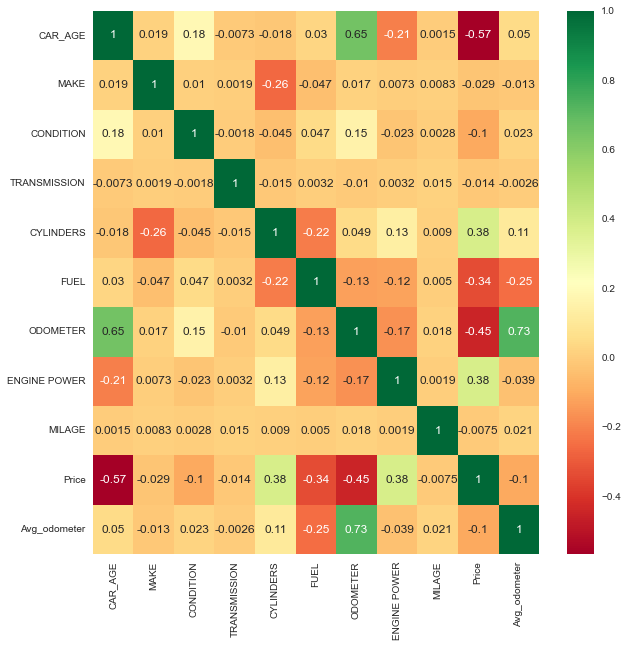

In [27]:
# to get correlation between each feature
x = df.iloc[:,1:10]  
y = df.iloc[:,10]    
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'ODOMETER'}>,
        <AxesSubplot:title={'center':'Avg_odometer'}>],
       [<AxesSubplot:title={'center':'CAR_AGE'}>, <AxesSubplot:>]],
      dtype=object)

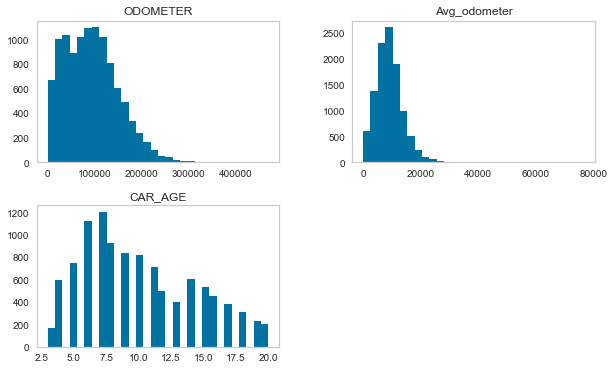

In [28]:
#to get skewed data visualization
df.hist(column =['ODOMETER', 'Avg_odometer','MODEL','CAR_AGE'], grid=False,figsize=(10, 6),bins=30)

In [29]:
df['ODOMETER'].skew()

0.7006488442296499

In [30]:
df.insert(len(df.columns), 'Car_Age', stats.boxcox(df['CAR_AGE'])[0])
df.insert(len(df.columns), 'odometer',stats.boxcox(df['ODOMETER'])[0])

array([[<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'ODOMETER'}>],
       [<AxesSubplot:title={'center':'CAR_AGE'}>,
        <AxesSubplot:title={'center':'Car_Age'}>]], dtype=object)

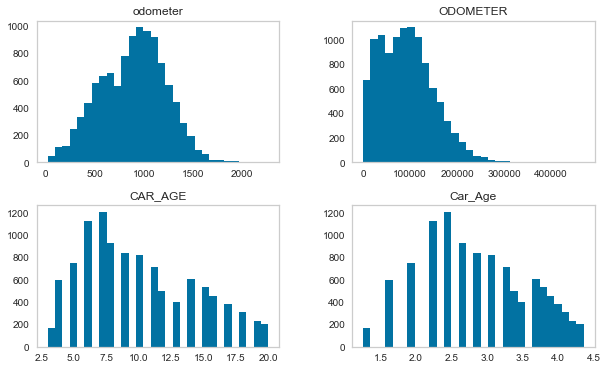

In [31]:
#,'CAR_AGE', 'A_Sqrt'
df.hist(column =['odometer', 'ODOMETER','CAR_AGE','Car_Age'], grid=False,figsize=(10, 6),bins=30)

In [32]:
df.agg(['skew', 'kurtosis']).transpose()

C:\Users\AYUSHI D MALAVIYA\AppData\Local\Temp\ipykernel_36496\1018153801.py:1: FutureWarning: ['MODEL'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
CAR_AGE,0.501745,-0.751868
MAKE,0.708133,-0.928512
CONDITION,8.098594,63.599042
TRANSMISSION,0.399307,-1.840896
CYLINDERS,-0.318246,-1.232023
FUEL,-1.956030,1.826393
ODOMETER,0.700649,0.698462
ENGINE POWER,-1.247304,-0.233457
MILAGE,-0.007127,-1.193193
Price,0.305120,-1.907256


In [33]:
#dropped and renamed unwated and wanted columns
df.drop(['ODOMETER','Avg_odometer','MILAGE', 'CONDITION', 'CAR_AGE','MODEL'], inplace=True, axis=1)
df = df.rename({'odometer': 'ODOMETER','category':'MILEAGE', 'Car_Age' : 'CAR_AGE'}, axis=1)

In [34]:
#convert mileage type to int type
df['MILEAGE']=df['MILEAGE'].astype('int64')

In [35]:
df = df[['CAR_AGE', 'MAKE', 'TRANSMISSION', 'CYLINDERS', 'FUEL', 'ENGINE POWER', 'MILEAGE', 'ODOMETER', 'Price']]

## Spliting the 70% of data into train data & 30% of data into test data

In [36]:
X = df.iloc[:,:8]
y = df.iloc[:,8]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7534, 8) (3229, 8) (7534,) (3229,)


### Scaling Continous Values

In [38]:
mms =  MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

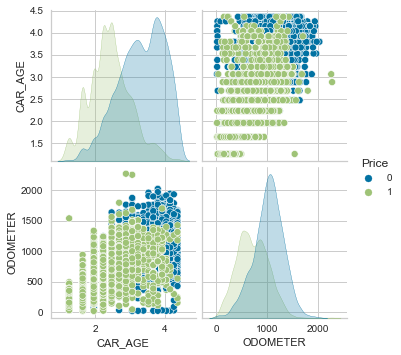

In [39]:
sns.pairplot(df, hue='Price', vars=['CAR_AGE','ODOMETER'])

## Feature Selection & Importance

In [40]:
#model development and fitting the features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

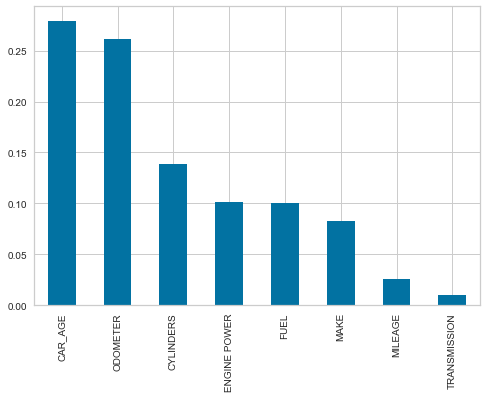

In [41]:
#to extract importance of the data
rf.feature_importances_

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')

## Model Development & Execution
- `Cat Boosting` 
- `Light Gradient Boosting`
- `Artificial Neural Network`

### (3) CAT Boosting

In [42]:
#to get cat boost classifier
cbc = ctb.CatBoostClassifier()
#fit the model
cbc = cbc.fit(X_train, y_train)
#predict the model
y_pred = cbc.predict(X_test)

Learning rate set to 0.024402
0:	learn: 0.6600391	total: 145ms	remaining: 2m 25s
1:	learn: 0.6326192	total: 160ms	remaining: 1m 19s
2:	learn: 0.6053611	total: 167ms	remaining: 55.6s
3:	learn: 0.5796285	total: 173ms	remaining: 43s
4:	learn: 0.5545148	total: 177ms	remaining: 35.3s
5:	learn: 0.5330791	total: 181ms	remaining: 30s
6:	learn: 0.5143966	total: 185ms	remaining: 26.2s
7:	learn: 0.4957545	total: 189ms	remaining: 23.5s
8:	learn: 0.4790950	total: 194ms	remaining: 21.3s
9:	learn: 0.4642232	total: 198ms	remaining: 19.6s
10:	learn: 0.4490224	total: 203ms	remaining: 18.2s
11:	learn: 0.4350990	total: 209ms	remaining: 17.2s
12:	learn: 0.4233982	total: 213ms	remaining: 16.2s
13:	learn: 0.4111292	total: 217ms	remaining: 15.3s
14:	learn: 0.3997722	total: 221ms	remaining: 14.5s
15:	learn: 0.3903057	total: 225ms	remaining: 13.8s
16:	learn: 0.3821458	total: 228ms	remaining: 13.2s
17:	learn: 0.3730750	total: 233ms	remaining: 12.7s
18:	learn: 0.3650867	total: 237ms	remaining: 12.2s
19:	learn: 0.

In [43]:
#accuracy, precision, recall and f1 score
print(accuracy_score(y_test, y_pred))
print('Confusion Metrics: \n\n', confusion_matrix(y_test,y_pred))
print('Classification report\n', classification_report(y_test, y_pred))

0.9269123567668008
Confusion Metrics: 

 [[1716  145]
 [  91 1277]]
Classification report
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1861
           1       0.90      0.93      0.92      1368

    accuracy                           0.93      3229
   macro avg       0.92      0.93      0.93      3229
weighted avg       0.93      0.93      0.93      3229



<AxesSubplot:>

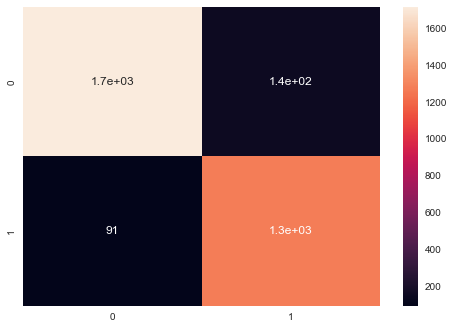

In [44]:
#heat map visualization
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True)

### (4) Light Gradient Boosting (LGB)

In [45]:
#model development
lgb = LGBMClassifier()
model = lgb.fit(X_train,y_train)
lgb_pred = lgb.predict(X_test)
print('Accuracy Score is: ',accuracy_score(y_test, lgb_pred))
print('\n\n\nclassification_report of data after Knn applied: \n',classification_report(y_test, lgb_pred),'\n\n') 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, lgb_pred),'\n\n')

Accuracy Score is:  0.9303189842056364



classification_report of data after Knn applied: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1861
           1       0.90      0.94      0.92      1368

    accuracy                           0.93      3229
   macro avg       0.93      0.93      0.93      3229
weighted avg       0.93      0.93      0.93      3229
 


Confusion Matrix of data predicted 
 [[1717  144]
 [  81 1287]] 




<AxesSubplot:>

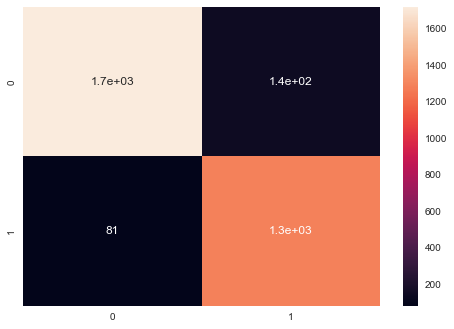

In [46]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, lgb_pred)), annot=True)

## Artificial Neural Network

In [58]:
ann_model_0 = 'Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Relu, Output_Layer: Sigmoid'
ann0 = keras.models.Sequential()
ann0.add(keras.layers.Dense(4, input_dim=8, activation='relu'))
ann0.add(keras.layers.Dense(2, activation='relu'))
ann0.add(keras.layers.Dense(1, activation='relu'))
ann0.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model0 = ann1.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2365 - accuracy: 0.9008
Epoch 2/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2364 - accuracy: 0.8998
Epoch 3/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2363 - accuracy: 0.9005
Epoch 4/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2366 - accuracy: 0.9006
Epoch 5/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2365 - accuracy: 0.9005
Epoch 6/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2365 - accuracy: 0.9002
Epoch 7/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2364 - accuracy: 0.9006
Epoch 8/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2363 - accuracy: 0.9007
Epoch 9/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2364 - accuracy: 0.9005
Epoch 10/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2362 - accuracy: 0.9018

In [49]:
ann_model_1 = 'Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Sigmoid, Output_Layer: Sigmoid'
ann1 = keras.models.Sequential()
ann1.add(keras.layers.Dense(4, input_dim=8, activation='sigmoid'))
ann1.add(keras.layers.Dense(4, activation='sigmoid'))
ann1.add(keras.layers.Dense(1, activation='sigmoid'))
ann1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model1 = ann1.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
754/754 [==============================] - 2s 1ms/step - loss: 0.6633 - accuracy: 0.5750
Epoch 2/80
754/754 [==============================] - 1s 1ms/step - loss: 0.5940 - accuracy: 0.6980
Epoch 3/80
754/754 [==============================] - 1s 1ms/step - loss: 0.4799 - accuracy: 0.8646
Epoch 4/80
754/754 [==============================] - 1s 1ms/step - loss: 0.3767 - accuracy: 0.8893
Epoch 5/80
754/754 [==============================] - 1s 1ms/step - loss: 0.3156 - accuracy: 0.8945
Epoch 6/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2842 - accuracy: 0.8938
Epoch 7/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.8963
Epoch 8/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2589 - accuracy: 0.8950
Epoch 9/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy: 0.8974
Epoch 10/80
754/754 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.8958

Activation Function applied on Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Relu, Output_Layer: Sigmoid 


101/101 [==============================] - 0s 1ms/step - loss: 2.7509 - accuracy: 0.6860
Loss and Accuracy for ANN Model: [2.7509031295776367, 0.6859709024429321] 


Area Under Curve Score = 0.6340335322454443 




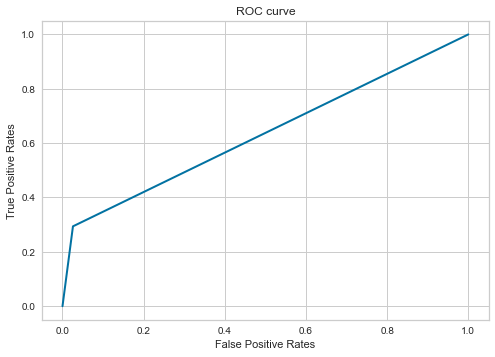

Accuracy Score is:  0.6859708888200682



classification_report  applied: 
               precision    recall  f1-score   support

           0       0.65      0.97      0.78      1861
           1       0.89      0.29      0.44      1368

    accuracy                           0.69      3229
   macro avg       0.77      0.63      0.61      3229
weighted avg       0.75      0.69      0.64      3229
 


Confusion Matrix of data predicted 
 [[1813   48]
 [ 966  402]] 


Activation Function applied on Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Sigmoid, Output_Layer: Sigmoid 


101/101 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.8972
Loss and Accuracy for ANN Model: [0.2401508092880249, 0.8971818089485168] 


Area Under Curve Score = 0.8986976048845021 




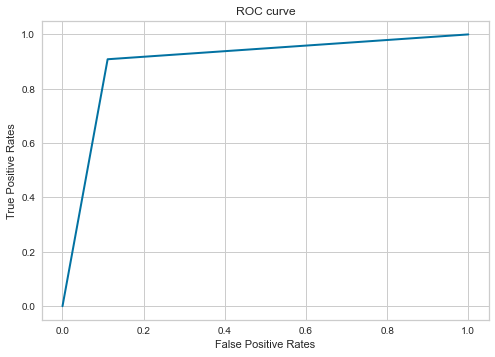

Accuracy Score is:  0.8971817900278725



classification_report  applied: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1861
           1       0.86      0.91      0.88      1368

    accuracy                           0.90      3229
   macro avg       0.89      0.90      0.90      3229
weighted avg       0.90      0.90      0.90      3229
 


Confusion Matrix of data predicted 
 [[1654  207]
 [ 125 1243]] 




In [59]:
dic = {ann_model_0:ann0, ann_model_1:ann1}
for i, j in dic.items():
    print("Activation Function applied on",i,'\n\n')
    y_predict = j.predict(X_test)
    y_predict = (y_predict>0.5)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    print("Loss and Accuracy for ANN Model:",j.evaluate(X_test, y_test),'\n\n')
    print('Area Under Curve Score =',roc_auc_score(y_test, y_predict),'\n\n')
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve',linewidth=2)
    plt.ylabel("True Positive Rates")
    plt.xlabel("False Positive Rates")
    plt.title("ROC curve")
    plt.show()
    print('Accuracy Score is: ',accuracy_score(y_test, y_predict))
    print('\n\n\nclassification_report  applied: \n',classification_report(y_test, y_predict),'\n\n') 
    print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_predict),'\n\n')